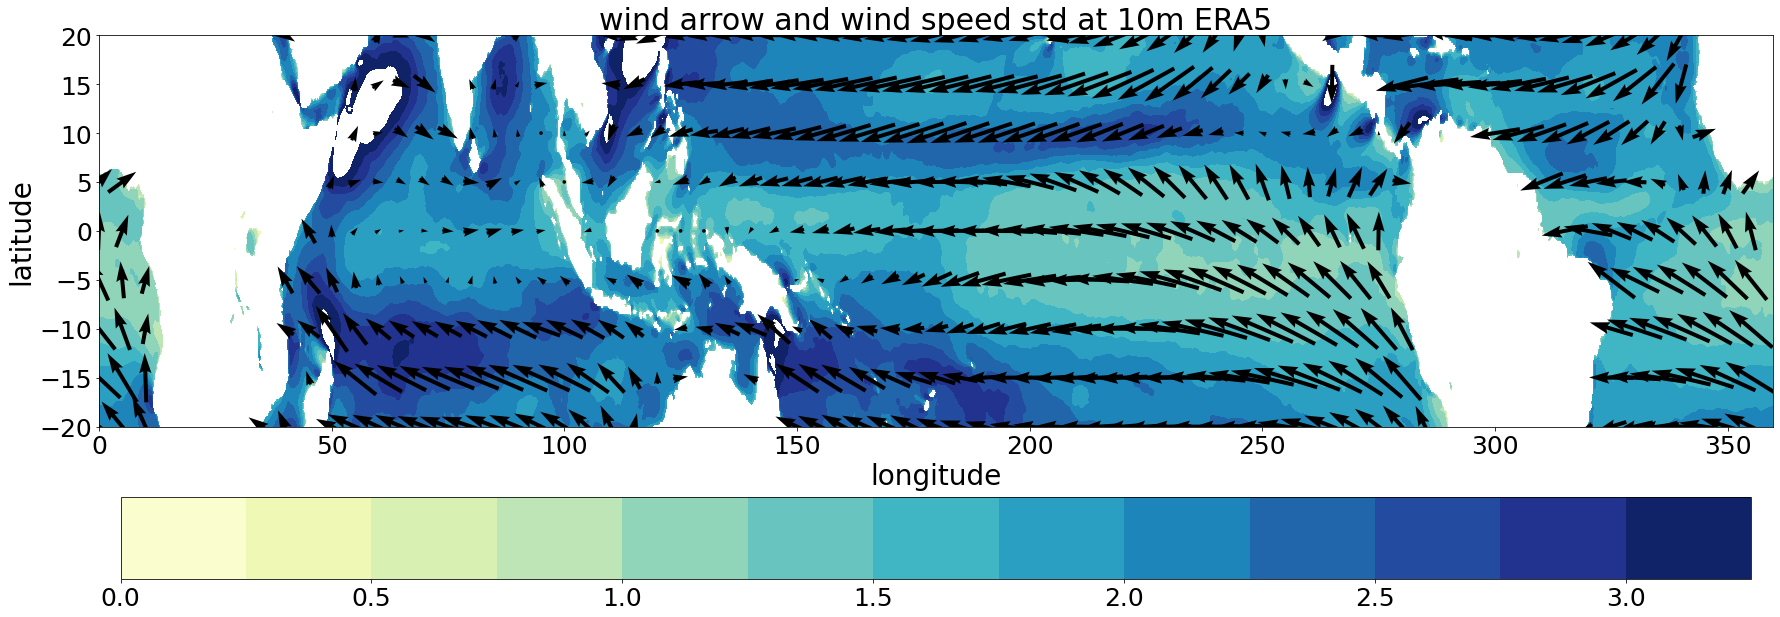

In [5]:
# To add a new cell, type '# %%'
# To add a new markdown cell, type '# %% [markdown]'
# %%
import iris
import numpy as np
import sys
sys.path.append('/pf/b/b381639/Analysis')
import fxtian_function as fx
from iris.time import PartialDateTime
import datetime
import cf_units
import iris.coord_categorisation
import iris.quickplot as qplt
import matplotlib.pyplot as plt
import numpy as np
import xarray as ar



###############
# plot ERA5
###############

## Readin UVwsp


datain = iris.load_cube('/work/bb1153/b381639/ERA5/wsp10_daymean_2020_tropical_ocean_timstd.nc')
datain.data=datain.data
#datain.data=datain.data*-1
regyonx=datain[0,:,:]
ERA5=regyonx

datain = iris.load_cube('/work/bb1153/b381639/ERA5/u10_mon_2020_tropical_ocean_timmean.nc')
datain.data=datain.data
#datain.data=datain.data*-1
regyonx=datain[0,:,:]
uERA5=regyonx



datain = iris.load_cube('/work/bb1153/b381639/ERA5/v10_mon_2020_tropical_ocean_timmean.nc')
datain.data=datain.data
#datain.data=datain.data*-1
regyonx=datain[0,:,:]
vERA5=regyonx


######################
#plot a map lat vs Lon
########################
########
#(1) get x-axis and y axis
arr=ar.DataArray.from_iris(ERA5) # iris cube to xarray
latm=arr.latitude.data              # latm is x-axis
lonm=arr.longitude.data   # +180         # lonm is y-axis  
#arr = np.roll(arr, 720, axis = 3)
#print(arr[0,0,:].data)

arru=ar.DataArray.from_iris(uERA5) # iris cube to xarray
latu=arru.latitude.data              # latm is x-axis
lonu=arru.longitude.data   # +180         # lonm is y-axis  
#arru = np.roll(arru, 720, axis = 3)

arrv=ar.DataArray.from_iris(uERA5) # iris cube to xarray
latv=arrv.latitude.data              # latm is x-axis
lonv=arrv.longitude.data   # +180         # lonm is y-axis  
#arrv = np.roll(arrv, 720, axis = 3)

x=uERA5.coord('longitude').points
y=uERA5.coord('latitude').points



##################
#(2)set color bar and prepare fig size
#levels1=np.arange(15,35,1) # min and max of the field; dont use it if not sure
levels1=np.arange(0,3.5,0.25) # min and max of the field; dont use it if not sure
#cbar='winter'
#levels1=np.arange(-.5,.5,0.05) # min and max of the field; dont use it if not sure
#cbar='ocean'
#cbar='seismic'
cbar='YlGnBu'
plt.figure(figsize=(30,10))

########
#plot the figure
plt.contourf(lonm,latm,arr,levels=levels1,cmap = cbar)
#plt.contourf(lonm,latm,arr[0,0,:,:],cmap = cbar)
#plt.title('SST- ICON 5N-5S daily from 20/1/2020')



plt.title('wind arrow and wind speed std at 10m ERA5',fontsize=30)
cbar=plt.colorbar(orientation='horizontal', pad=0.13)
cbar.ax.tick_params(labelsize = 25)
        
plt.quiver(x[::20],y[::20],uERA5[::20,::20].data,vERA5[::20,::20].data,pivot='middle',scale=200)
        
plt.xlabel(('longitude'), fontsize=28)
plt.ylabel(('latitude'), fontsize=28)
plt.xticks(fontsize=25)#, rotation=90)
plt.yticks(fontsize=25)#, rotation=90)

#####save figure
plt.savefig('wsp10_std_ERA5.eps',format='eps',dpi=1000)

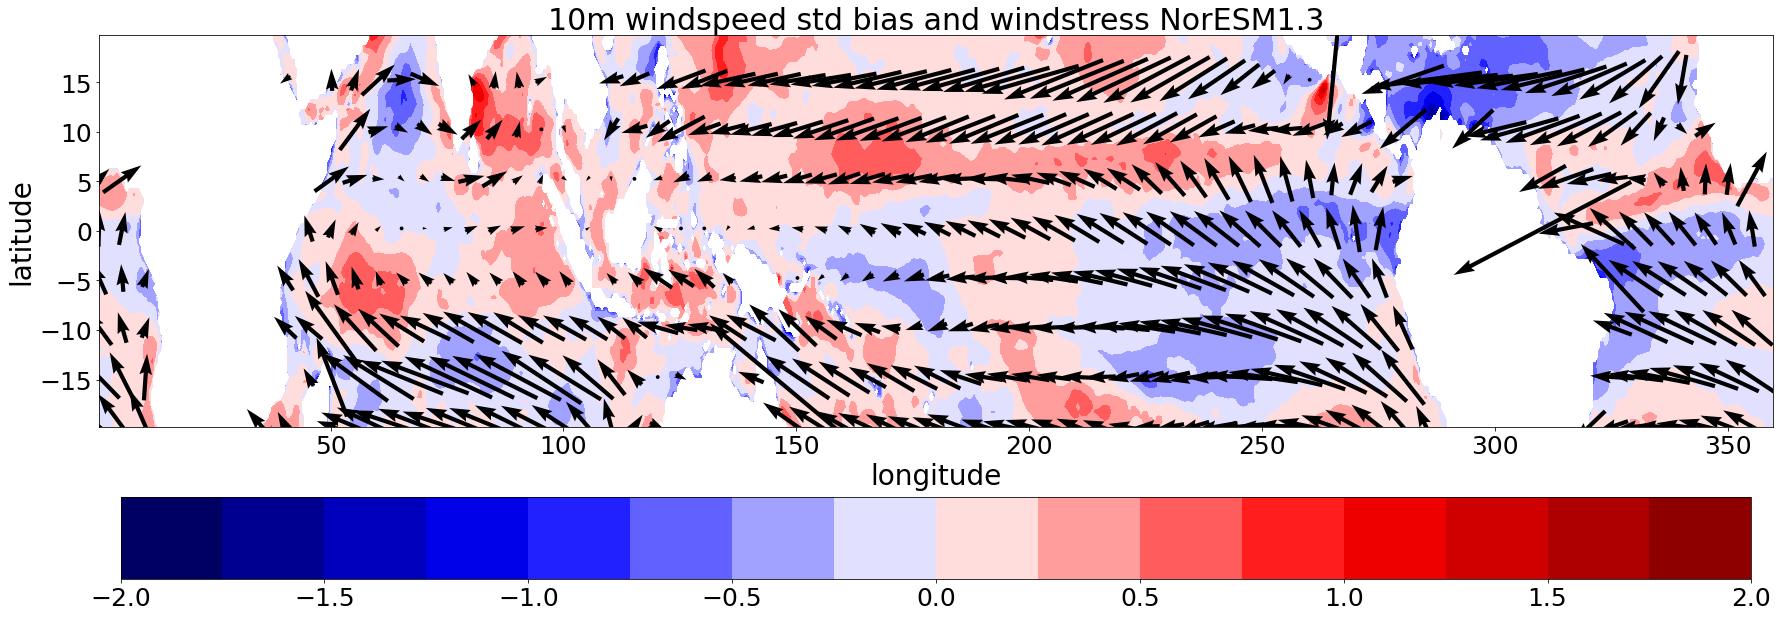

In [15]:
# To add a new cell, type '# %%'
# To add a new markdown cell, type '# %% [markdown]'
# %%
import iris
import numpy as np
import sys
sys.path.append('/pf/b/b381639/Analysis')
import fxtian_function as fx
from iris.time import PartialDateTime
import datetime
import cf_units
import iris.coord_categorisation
import iris.quickplot as qplt
import matplotlib.pyplot as plt
import numpy as np
import xarray as ar



###############
# plot NorESM
###############

## Readin UVwsp
df=ar.open_dataset('/work/bb1153/b381639/NorESM/U10_150_tropical_ocean_timstd_bias.nc')
#df.coords['longitude'] = np.where(df.coords['longitude']<0,df.coords['longitude']+360,df.coords['longitude'])
#df = df.sortby(df.longitude)

latm=df.latitude.data              # latm is x-axis
lonm=df.longitude.data   # +180         # lonm is y-axis 

du=ar.open_dataset('/work/bb1153/b381639/NorESM/TAUX_150_tropical_ocean_timmean.nc')
#du.coords['longitude'] = np.where(du.coords['longitude']<0,du.coords['longitude']+360,du.coords['longitude'])
#du = du.sortby(du.longitude)

dv=ar.open_dataset('/work/bb1153/b381639/NorESM/TAUY_150_tropical_ocean_timmean.nc')
#dv.coords['longitude'] = np.where(dv.coords['longitude']<0,dv.coords['longitude']+360,dv.coords['longitude'])
#dv = dv.sortby(dv.longitude)


x=du.longitude.data
y=du.latitude.data


##################
#(2)set color bar and prepare fig size
#levels1=np.arange(15,35,1) # min and max of the field; dont use it if not sure
levels1=np.arange(-2,2.25,0.25) # min and max of the field; dont use it if not sure
#cbar='winter'
#levels1=np.arange(-.5,.5,0.05) # min and max of the field; dont use it if not sure
#cbar='ocean'
cbar='seismic'
#cbar='YlGnBu'
plt.figure(figsize=(30,10))

########
#plot the figure
plt.contourf(lonm,latm,df.U10[0,:,:],levels=levels1,cmap = cbar)


plt.title('10m windspeed std bias and windstress NorESM1.3',fontsize=30)
cbar=plt.colorbar(orientation='horizontal', pad=0.13)
cbar.ax.tick_params(labelsize = 25)
        
plt.quiver(x[::10],y[::10],du.TAUX[0,::10,::10].data*-1,dv.TAUY[0,::10,::10].data*-1,pivot='middle',scale=2)

plt.xlabel(('longitude'), fontsize=28)
plt.ylabel(('latitude'), fontsize=28)
plt.xticks(fontsize=25)#, rotation=90)
plt.yticks(fontsize=25)#, rotation=90)

#####save figure
plt.savefig('wsp10_std_bias_NorESM1.3_TAUXY.eps',format='eps',dpi=1000)




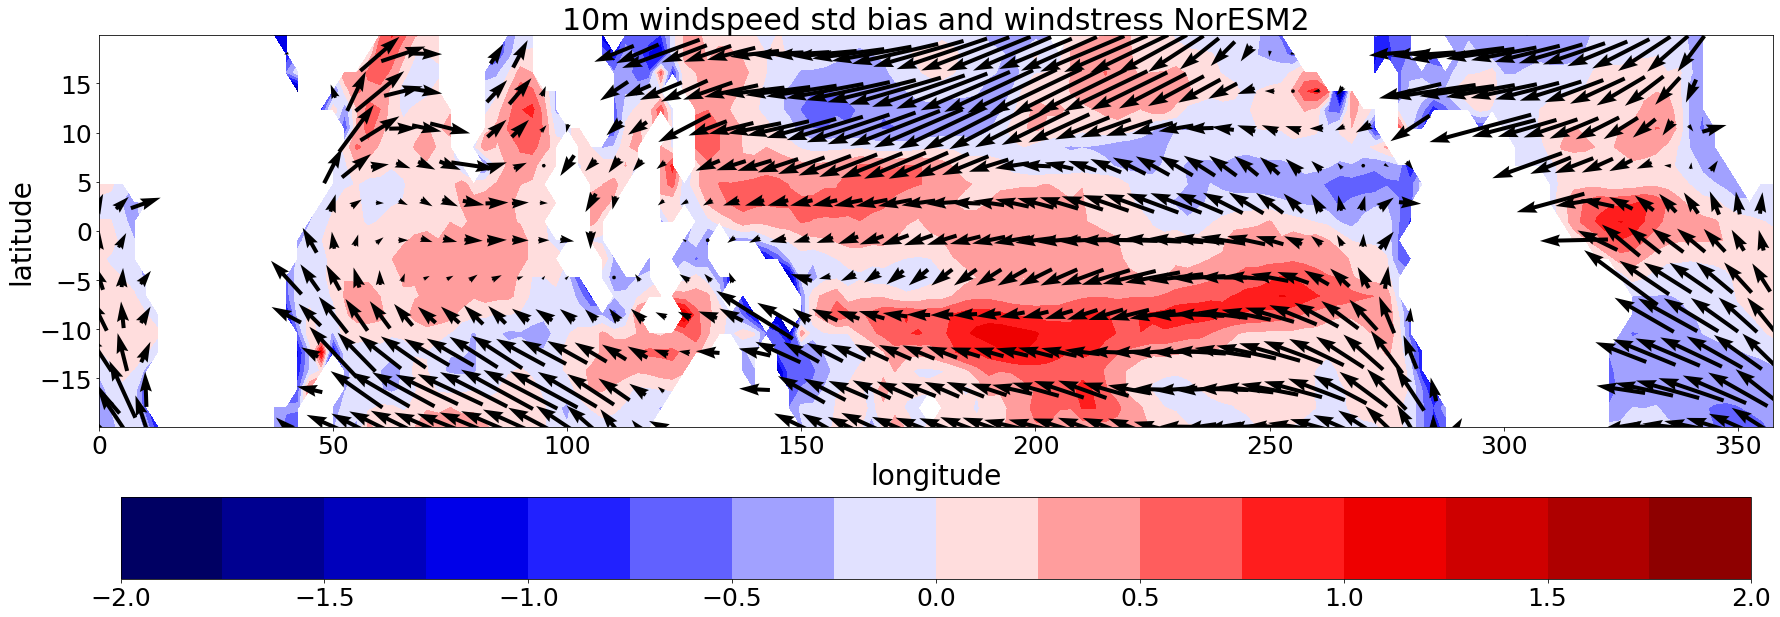

In [14]:
# To add a new cell, type '# %%'
# To add a new markdown cell, type '# %% [markdown]'
# %%
import iris
import numpy as np
import sys
sys.path.append('/pf/b/b381639/Analysis')
import fxtian_function as fx
from iris.time import PartialDateTime
import datetime
import cf_units
import iris.coord_categorisation
import iris.quickplot as qplt
import matplotlib.pyplot as plt
import numpy as np
import xarray as ar



###############
# plot NorESM2
###############

## Readin UVwsp
df=ar.open_dataset('/work/bb1153/b381639/NorESM2/sfcWind_day_NorESM2-LM_historical_r3i1p1f1_gn_2010_tropical_ocean_timstd_bias.nc')


latm=df.lat.data              # latm is x-axis
lonm=df.lon.data   # +180         # lonm is y-axis 

du=ar.open_dataset('/work/bb1153/b381639/NorESM2/tauu_Amon_NorESM2-LM_historical_r3i1p1f1_gn_2010_tropical_ocean_timmean.nc')


dv=ar.open_dataset('/work/bb1153/b381639/NorESM2/tauv_Amon_NorESM2-LM_historical_r3i1p1f1_gn_2010_tropical_ocean_timmean.nc')



x=du.lon.data
y=du.lat.data


##################
#(2)set color bar and prepare fig size
#levels1=np.arange(15,35,1) # min and max of the field; dont use it if not sure
levels1=np.arange(-2,2.25,0.25) # min and max of the field; dont use it if not sure
#cbar='winter'
#levels1=np.arange(-.5,.5,0.05) # min and max of the field; dont use it if not sure
#cbar='ocean'
cbar='seismic'
#cbar='YlGnBu'
plt.figure(figsize=(30,10))

########
#plot the figure
plt.contourf(lonm,latm,df.sfcWind[0,:,:],levels=levels1,cmap = cbar)


plt.title('10m windspeed std bias and windstress NorESM2',fontsize=30)
cbar=plt.colorbar(orientation='horizontal', pad=0.13)
cbar.ax.tick_params(labelsize = 25)
        
plt.quiver(x[::2],y[::2],du.tauu[0,::2,::2].data,dv.tauv[0,::2,::2].data,pivot='middle',scale=2)

plt.xlabel(('longitude'), fontsize=28)
plt.ylabel(('latitude'), fontsize=28)
plt.xticks(fontsize=25)#, rotation=90)
plt.yticks(fontsize=25)#, rotation=90)

#####save figure
plt.savefig('wsp10_std_bias_NorESM2_TAUXY.eps',format='eps',dpi=1000)


